<a href="https://colab.research.google.com/github/ykato27/Density_Ratio_Estimation/blob/main/Density_Ratio_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from scipy.stats import norm
from densratio import densratio

In [4]:
np.random.seed(1)
x = norm.rvs(size=500, loc=0, scale=1./8)
y = norm.rvs(size=500, loc=0, scale=1./2)
alpha = 0.1
densratio_obj = densratio(x, y, alpha=alpha)
print(densratio_obj)

RuLSIF starting...
Searching for the optimal sigma and lambda...
sigma = 0.00100, lambda = 0.00100, score = -0.46706
sigma = 0.00100, lambda = 0.01000, score = -0.32477
sigma = 0.00100, lambda = 0.10000, score = -0.05077
sigma = 0.00100, lambda = 1.00000, score = -0.00538
sigma = 0.00100, lambda = 10.00000, score = -0.00054
sigma = 0.00100, lambda = 100.00000, score = -0.00005
sigma = 0.00100, lambda = 1000.00000, score = -0.00001
sigma = 0.00100, lambda = 10000.00000, score = -0.00000
sigma = 0.00100, lambda = 100000.00000, score = -0.00000
sigma = 0.00100, lambda = 1000000.00000, score = -0.00000
sigma = 0.00100, lambda = 10000000.00000, score = -0.00000
sigma = 0.00100, lambda = 100000000.00000, score = -0.00000
sigma = 0.00100, lambda = 1000000000.00000, score = -0.00000
sigma = 0.01000, lambda = 0.00100, score = -0.93681
sigma = 0.01000, lambda = 0.01000, score = -1.20355
sigma = 0.01000, lambda = 0.10000, score = -0.93471
sigma = 0.01000, lambda = 1.00000, score = -0.28313
sigma 

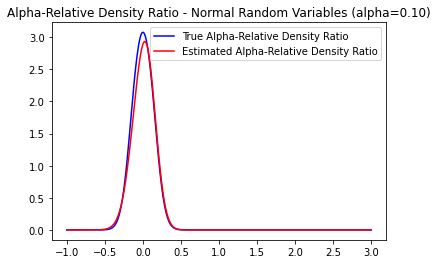

In [5]:
from matplotlib import pyplot as plt
from numpy import linspace

def true_alpha_density_ratio(sample):
    return norm.pdf(sample, 0, 1./8) / (alpha * norm.pdf(sample, 0, 1./8) + (1 - alpha) * norm.pdf(sample, 0, 1./2))

def estimated_alpha_density_ratio(sample):
    return densratio_obj.compute_density_ratio(sample)

sample_points = np.linspace(-1, 3, 400)
plt.plot(sample_points, true_alpha_density_ratio(sample_points), 'b-', label='True Alpha-Relative Density Ratio')
plt.plot(sample_points, estimated_alpha_density_ratio(sample_points), 'r-', label='Estimated Alpha-Relative Density Ratio')
plt.title("Alpha-Relative Density Ratio - Normal Random Variables (alpha={:03.2f})".format(alpha))
plt.legend()
plt.show()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# ちょっと分散の違う正規分布
normal_data = np.random.normal(100, 10, 10000)
abnormal_data = np.random.normal(100, 9, 10000)

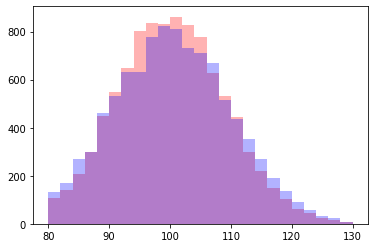

In [7]:
plt.hist(abnormal_data, bins=25, alpha=0.3, color='r', range=[80,130])
plt.hist(normal_data, bins=25, alpha=0.3, color='b', range=[80,130])
plt.show()

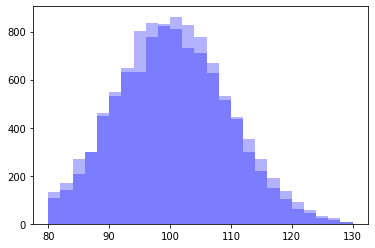

In [8]:
normal_hist = plt.hist(normal_data, bins=25, alpha=0.3, color='b', range=[80,130])
abnormal_hist = plt.hist(abnormal_data, bins=25, alpha=0.3, color='b', range=[80,130])


x_range_list = list(normal_hist[1] )
true_x_range_list = []
"""
plt.hist()[1]は植木算における木の棒、plt.hist()[0]は木の間隔なので長さが１違う！
だから len(x_range_list)-1
"""
for i in range(0, len(x_range_list) - 1):
    true_x_range_list.append((x_range_list[i] + x_range_list[i+1])/2)

normal_data_df = pd.DataFrame()
abnormal_data_df = pd.DataFrame()

normal_data_df['action_count'] = true_x_range_list
normal_data_df['frequency'] = normal_hist[0]/len(normal_data)

abnormal_data_df['action_count'] = true_x_range_list
abnormal_data_df['frequency'] = abnormal_hist[0]/len(abnormal_data)

In [9]:
abnormal_data_df

,action_count,frequency
0,81.0,0.0107
1,83.0,0.0142
2,85.0,0.0206
3,87.0,0.0297
4,89.0,0.0448
5,91.0,0.0547
6,93.0,0.0649
7,95.0,0.0804
8,97.0,0.0835
9,99.0,0.0830


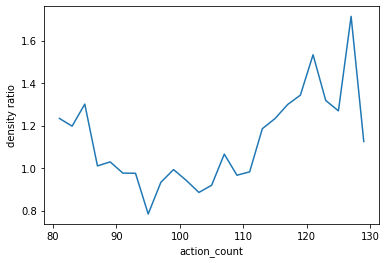

In [10]:
plt.plot(true_x_range_list, normal_data_df['frequency']/abnormal_data_df['frequency'])
plt.xlabel('action_count')
plt.ylabel('density ratio')
plt.show()

In [11]:
abnormality = np.mean((1 - normal_data_df['frequency']/abnormal_data_df['frequency'])**2)
abnormality

0.06185243808988217

In [12]:
from numpy import random
from scipy.stats import norm
from densratio import densratio

x = np.random.normal(100, 10, 10000)
y = np.random.normal(100, 9, 10000)
result = densratio(x, y)
print(result)

RuLSIF starting...
Searching for the optimal sigma and lambda...
sigma = 0.00100, lambda = 0.00100, score = -0.00169
sigma = 0.00100, lambda = 0.01000, score = -0.00019
sigma = 0.00100, lambda = 0.10000, score = -0.00002
sigma = 0.00100, lambda = 1.00000, score = -0.00000
sigma = 0.00100, lambda = 10.00000, score = -0.00000
sigma = 0.00100, lambda = 100.00000, score = -0.00000
sigma = 0.00100, lambda = 1000.00000, score = -0.00000
sigma = 0.00100, lambda = 10000.00000, score = -0.00000
sigma = 0.00100, lambda = 100000.00000, score = -0.00000
sigma = 0.00100, lambda = 1000000.00000, score = -0.00000
sigma = 0.00100, lambda = 10000000.00000, score = -0.00000
sigma = 0.00100, lambda = 100000000.00000, score = -0.00000
sigma = 0.00100, lambda = 1000000000.00000, score = -0.00000
sigma = 0.01000, lambda = 0.00100, score = -0.02940
sigma = 0.01000, lambda = 0.01000, score = -0.00558
sigma = 0.01000, lambda = 0.10000, score = -0.00062
sigma = 0.01000, lambda = 1.00000, score = -0.00006
sigma 

In [13]:
result.compute_density_ratio(y)
abnormality = - np.log(result.compute_density_ratio(y))

abnormality

array([9.99994999e-06, 9.99995000e-06, 9.99994999e-06, ...,
       9.99995001e-06, 9.99995000e-06, 9.99995000e-06])

In [14]:
np.mean(abnormality)

9.99994999435096e-06

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 正規分布＋平均の違う正規分布で多峰な分布を作る
normal_data = np.random.normal(100, 10, 10000)
abnormal_data = np.append(np.random.normal(100, 10, 10000), np.random.normal(130, 1, 10))

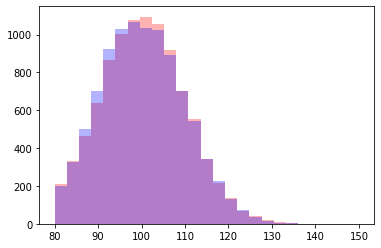

In [16]:
plt.hist(abnormal_data, bins=25, alpha=0.3, color='r', range=[80,150])
plt.hist(normal_data, bins=25, alpha=0.3, color='b', range=[80,150])
plt.show()

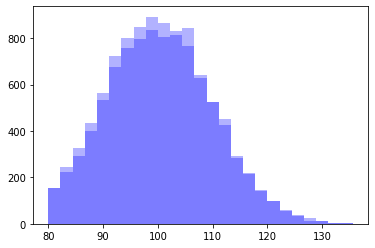

In [17]:
normal_hist = plt.hist(normal_data, bins=25, alpha=0.3, color='b', range=[80,normal_data.max()])
abnormal_hist = plt.hist(abnormal_data, bins=25, alpha=0.3, color='b', range=[80,normal_data.max()])


x_range_list = list(normal_hist[1] )
true_x_range_list = []
for i in range(0, len(x_range_list) - 1):
    true_x_range_list.append((x_range_list[i] + x_range_list[i+1])/2)

normal_data_df = pd.DataFrame()
abnormal_data_df = pd.DataFrame()

normal_data_df['action_count'] = true_x_range_list
normal_data_df['frequency'] = normal_hist[0]/len(normal_data)

abnormal_data_df['action_count'] = true_x_range_list
abnormal_data_df['frequency'] = abnormal_hist[0]/len(abnormal_data)

In [18]:
normal_data_df

,action_count,frequency
0,81.111106,0.0156
1,83.333319,0.0221
2,85.555531,0.0328
3,87.777744,0.0433
4,89.999956,0.0562
5,92.222168,0.0723
6,94.444381,0.0801
7,96.666593,0.0847
8,98.888806,0.0835
9,101.111018,0.0805


In [19]:
abnormal_data_df

,action_count,frequency
0,81.111106,0.015385
1,83.333319,0.024376
2,85.555531,0.029271
3,87.777744,0.039960
4,89.999956,0.053347
5,92.222168,0.067433
6,94.444381,0.075624
7,96.666593,0.079520
8,98.888806,0.089111
9,101.111018,0.086613


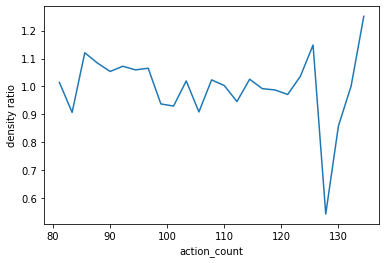

In [20]:
plt.plot(true_x_range_list, normal_data_df['frequency']/abnormal_data_df['frequency'])
plt.xlabel('action_count')
plt.ylabel('density ratio')
plt.show()

In [21]:
abnormality = np.mean((1 - normal_data_df['frequency']/abnormal_data_df['frequency'])**2)
abnormality

0.015414088888863147

In [22]:
from numpy import random
from scipy.stats import norm
from densratio import densratio

x = np.random.normal(100, 10, 10010)
y = np.append(np.random.normal(100, 10, 10000), np.random.normal(130, 1, 10))

result = densratio(x, y)
print(result)

RuLSIF starting...
Searching for the optimal sigma and lambda...
sigma = 0.00100, lambda = 0.00100, score = -0.00193
sigma = 0.00100, lambda = 0.01000, score = -0.00022
sigma = 0.00100, lambda = 0.10000, score = -0.00002
sigma = 0.00100, lambda = 1.00000, score = -0.00000
sigma = 0.00100, lambda = 10.00000, score = -0.00000
sigma = 0.00100, lambda = 100.00000, score = -0.00000
sigma = 0.00100, lambda = 1000.00000, score = -0.00000
sigma = 0.00100, lambda = 10000.00000, score = -0.00000
sigma = 0.00100, lambda = 100000.00000, score = -0.00000
sigma = 0.00100, lambda = 1000000.00000, score = -0.00000
sigma = 0.00100, lambda = 10000000.00000, score = -0.00000
sigma = 0.00100, lambda = 100000000.00000, score = -0.00000
sigma = 0.00100, lambda = 1000000000.00000, score = -0.00000
sigma = 0.01000, lambda = 0.00100, score = -0.04000
sigma = 0.01000, lambda = 0.01000, score = -0.00761
sigma = 0.01000, lambda = 0.10000, score = -0.00083
sigma = 0.01000, lambda = 1.00000, score = -0.00008
sigma 

In [23]:
result.compute_density_ratio(y)
abnormality = - np.log(result.compute_density_ratio(y))

abnormality

array([-0.00272423, -0.00411186, -0.00384976, ...,  0.03679777,
        0.04087728,  0.03708668])

In [24]:
np.mean(abnormality)

0.0009027937214698314

In [25]:
import numpy as np

class DensityRatioEstimation():
    def __init__(self, band_width=1.0, learning_rate=0.1, num_iterations=100):
        self.band_width = band_width
        self.theta = None
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.J = None
        self.psi = None
        self.psi_prime = None
        self.eps = 10e-15

    def fit(self, X_normal, X_error):
        self.theta = np.ones(len(X_normal))
        self.J = []

        self.psi = np.asarray([self._gauss_kernel(x, X_normal)
                               for x in X_normal])
        self.psi_prime = np.asarray(
            [self._gauss_kernel(x, X_normal) for x in X_error])
        dJ_1 = self.psi_prime.sum(axis=0) / len(X_error)

        for _ in range(self.num_iterations):
            # calculate J
            r = np.dot(self.psi, self.theta)
            r = np.maximum(r, self.eps)
            r_prime = np.dot(self.psi_prime, self.theta)
            r_prime = np.maximum(r_prime, self.eps)
            self.J.append(np.sum(r_prime)/len(X_error) -
                          np.sum(np.log(r))/len(X_normal))

            # calculate gradient
            dJ = dJ_1 - (self.psi / r).sum(axis=0) / len(X_normal)
            self.theta -= self.learning_rate * dJ

    def _gauss_kernel(self, x, X):
        return np.exp(-np.sum((x - X)**2, axis=1)/(2*self.band_width**2))

    def get_score(self):
        return self.J

    def objective(self, X_normal, X_error):
        # calculate J
        psi = np.asarray([self._gauss_kernel(x, X_normal)
                          for x in X_normal])
        psi_prime = np.asarray([self._gauss_kernel(x, X_normal)
                                for x in X_error])
        r = np.dot(psi, self.theta)
        r_prime = np.dot(psi_prime, self.theta)
        J = np.sum(r_prime)/len(X_error) - np.sum(np.log(r))/len(X_normal)
        return J

    def predict(self, X_normal, X_error):
        psi_prime = np.asarray([self._gauss_kernel(x, X_normal)
                                for x in X_error])
        r_prime = np.dot(psi_prime, self.theta)
        r_prime = np.maximum(r_prime, self.eps)
        return -np.log(r_prime)

min k: 0.4674161497430511


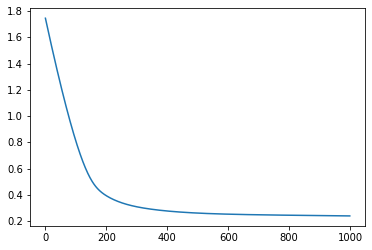

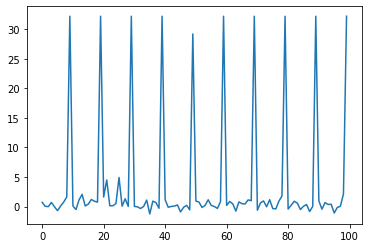

In [27]:
if __name__ == '__main__':
    import matplotlib.pyplot as plt
    from sklearn.model_selection import KFold

    normal_data = np.loadtxt("normal_data.csv", delimiter=",")
    error_data = np.loadtxt("error_data.csv", delimiter=",")

    kf_iter = KFold(n_splits=3).split(normal_data)

    # A rule-of-thumb bandwidth estimator
    # <https://en.wikipedia.org/wiki/Kernel_density_estimation>
    SILVERMAN = 1.06*np.std(normal_data, axis=0)/pow(len(normal_data), 1/5)

    ks = SILVERMAN + [0.1, 0.5, 1.0]
    scores = []
    ks_score = {}
    for k in ks:
        for train_index, valid_index in kf_iter:
            train_normal_data = normal_data[train_index]
            valid_normal_data = normal_data[valid_index]
            train_error_data = error_data[train_index]
            valid_error_data = error_data[valid_index]

            model = DensityRatioEstimation(
                band_width=k, learning_rate=0.1, num_iterations=1000)
            model.fit(train_normal_data, train_error_data)
            scores.append(model.get_score())

        ks_score[k] = np.mean(scores)

    min_k = min(ks_score, key=ks_score.get)
    print('min k:', min_k)

    model = DensityRatioEstimation(
        band_width=min_k, learning_rate=0.1, num_iterations=1000)
    model.fit(normal_data, error_data)

    scores = model.get_score()
    pred = model.predict(normal_data, error_data)

    plt.plot(scores)
    plt.show()

    plt.plot(pred)
    plt.show()